In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Data import and check

In [2]:
Test_tdcsfog_path = 'Data/test/tdcsfog/003f117e14.csv'

In [3]:
Test_tdcsfog_dataset = pd.read_csv(Test_tdcsfog_path)

In [4]:
Test_tdcsfog_dataset , Test_tdcsfog_dataset.shape

(      Time      AccV     AccML     AccAP
 0        0 -9.533939  0.566322 -1.413525
 1        1 -9.536140  0.564137 -1.440621
 2        2 -9.529345  0.561765 -1.429332
 3        3 -9.531239  0.564227 -1.415490
 4        4 -9.540825  0.561854 -1.429471
 ...    ...       ...       ...       ...
 4677  4677 -9.351431  0.370047 -2.286318
 4678  4678 -9.341410  0.347721 -2.321991
 4679  4679 -9.350667  0.361341 -2.297158
 4680  4680 -9.343977  0.365726 -2.292650
 4681  4681 -9.348477  0.379439 -2.335422
 
 [4682 rows x 4 columns],
 (4682, 4))

In [5]:
Test_tdcsfog_dataset.duplicated().sum()

0

#### Import without ID

In [6]:
# from pathlib import Path
# import pandas as pd

# data_dir = Path('Data/train/defog/')
# full_defog_dataset = pd.concat(
#     pd.read_csv(csv_files) for csv_files in data_dir.glob('*.csv')
#     )
# full_defog_dataset

In [7]:
# from pathlib import Path
# import pandas as pd

# data_dir = Path('Data/train/tdcsfog/')
# full_tdcsfog_dataset = pd.concat(
#     pd.read_csv(csv_files) for csv_files in data_dir.glob('*.csv'))
# full_tdcsfog_dataset

#### Import with ID

In [8]:
import os
import pandas as pd

# specify the folder path
folder_path = "Data/train/tdcsfog/"

# create an empty list to store the DataFrames
dfs = []

# loop over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        # extract the ID from the filename (assuming the filename is in the format "ID.csv")
        file_id = os.path.splitext(filename)[0]
        
        # read the CSV file into a DataFrame and add the ID as a new column
        df = pd.read_csv(os.path.join(folder_path, filename))
        df.insert(0, 'ID', file_id)
        
        # append the DataFrame to the list
        dfs.append(df)

# concatenate all DataFrames into a single DataFrame
full_tdcsfog_dataset = pd.concat(dfs)

# print the resulting DataFrame
full_tdcsfog_dataset

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,16c577bb75,0,-9.563005,0.147211,1.043645,0,0,0
1,16c577bb75,1,-9.560686,0.156369,1.032437,0,0,0
2,16c577bb75,2,-9.554016,0.149317,1.039120,0,0,0
3,16c577bb75,3,-9.558530,0.149386,1.043640,0,0,0
4,16c577bb75,4,-9.558615,0.142463,1.032258,0,0,0
...,...,...,...,...,...,...,...,...
4354,9dfe62541a,4354,-9.621144,0.355504,-2.511499,0,0,0
4355,9dfe62541a,4355,-9.605961,0.359085,-2.507750,0,0,0
4356,9dfe62541a,4356,-9.596194,0.363406,-2.508474,0,0,0
4357,9dfe62541a,4357,-9.590238,0.369310,-2.500274,0,0,0


In [9]:
condition = (full_tdcsfog_dataset.StartHesitation == 0) & (full_tdcsfog_dataset.Turn == 0) & (full_tdcsfog_dataset.Walking == 0)
condition_2 = (full_tdcsfog_dataset.StartHesitation == 1) | (full_tdcsfog_dataset.Turn == 1) | (full_tdcsfog_dataset.Walking == 1)

In [10]:
full_tdcsfog_dataset.loc[condition, 'All_zero'] = 1
full_tdcsfog_dataset.loc[condition_2, 'All_zero'] = 0
full_tdcsfog_dataset

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,16c577bb75,0,-9.563005,0.147211,1.043645,0,0,0,1.0
1,16c577bb75,1,-9.560686,0.156369,1.032437,0,0,0,1.0
2,16c577bb75,2,-9.554016,0.149317,1.039120,0,0,0,1.0
3,16c577bb75,3,-9.558530,0.149386,1.043640,0,0,0,1.0
4,16c577bb75,4,-9.558615,0.142463,1.032258,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...
4354,9dfe62541a,4354,-9.621144,0.355504,-2.511499,0,0,0,1.0
4355,9dfe62541a,4355,-9.605961,0.359085,-2.507750,0,0,0,1.0
4356,9dfe62541a,4356,-9.596194,0.363406,-2.508474,0,0,0,1.0
4357,9dfe62541a,4357,-9.590238,0.369310,-2.500274,0,0,0,1.0


In [11]:
full_tdcsfog_dataset.shape[0] == full_tdcsfog_dataset[condition].shape[0] + full_tdcsfog_dataset[condition_2].shape[0]

True

In [12]:
full_tdcsfog_dataset.shape[0] , full_tdcsfog_dataset[condition].shape[0] , full_tdcsfog_dataset[condition_2].shape[0]

(7062672, 4871262, 2191410)

In [13]:
# # Save the dataset

# full_tdcsfog_dataset.to_parquet('Data/raw/full_tdcsfog_dataset.parquet')
# full_tdcsfog_dataset.to_csv('Data/raw/full_tdcsfog_dataset.csv')

### Look around the data

In [14]:
full_tdcsfog_dataset.StartHesitation.value_counts()

0    6757882
1     304790
Name: StartHesitation, dtype: int64

In [15]:
full_tdcsfog_dataset.Turn.value_counts()

0    5383890
1    1678782
Name: Turn, dtype: int64

In [16]:
full_tdcsfog_dataset.Walking.value_counts()

0    6854834
1     207838
Name: Walking, dtype: int64

In [17]:
full_tdcsfog_dataset.shape

(7062672, 9)

In [18]:
full_tdcsfog_dataset.head()

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,16c577bb75,0,-9.563005,0.147211,1.043645,0,0,0,1.0
1,16c577bb75,1,-9.560686,0.156369,1.032437,0,0,0,1.0
2,16c577bb75,2,-9.554016,0.149317,1.039120,0,0,0,1.0
3,16c577bb75,3,-9.558530,0.149386,1.043640,0,0,0,1.0
4,16c577bb75,4,-9.558615,0.142463,1.032258,0,0,0,1.0


#### Learn Labels

In [19]:
full_tdcsfog_dataset[condition].shape[0] / full_tdcsfog_dataset.shape[0] *100

68.97194149749556

In [20]:
full_tdcsfog_dataset[condition_2].shape

(2191410, 9)

In [21]:
condition_3 = (full_tdcsfog_dataset.StartHesitation == 1) & (full_tdcsfog_dataset.Walking == 1) & (full_tdcsfog_dataset.Turn == 1)
full_tdcsfog_dataset[condition_3].shape[0]

0

In [22]:
full_tdcsfog_dataset.head()

,ID,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,16c577bb75,0,-9.563005,0.147211,1.043645,0,0,0,1.0
1,16c577bb75,1,-9.560686,0.156369,1.032437,0,0,0,1.0
2,16c577bb75,2,-9.554016,0.149317,1.039120,0,0,0,1.0
3,16c577bb75,3,-9.558530,0.149386,1.043640,0,0,0,1.0
4,16c577bb75,4,-9.558615,0.142463,1.032258,0,0,0,1.0


In [23]:
full_tdcsfog_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,7062672.0,9289.467297,13998.925696,0.000000,2119.000000,4310.000000,8433.000000,97076.000000
AccV,7062672.0,-9.306317,1.080174,-35.521119,-9.762402,-9.363524,-8.776814,20.906953
AccML,7062672.0,-0.201251,1.269525,-26.164398,-0.929545,-0.172225,0.575211,27.484719
AccAP,7062672.0,1.808524,2.285849,-47.829639,0.567225,1.987101,3.449026,30.337694
StartHesitation,7062672.0,0.043155,0.203206,0.000000,0.000000,0.000000,0.000000,1.000000
Turn,7062672.0,0.237698,0.425673,0.000000,0.000000,0.000000,0.000000,1.000000
Walking,7062672.0,0.029428,0.169002,0.000000,0.000000,0.000000,0.000000,1.000000
All_zero,7062672.0,0.689719,0.462608,0.000000,0.000000,1.000000,1.000000,1.000000


(-47.8296390463539, 30.3376942190701, -26.1643977260173, 27.4847190880829)

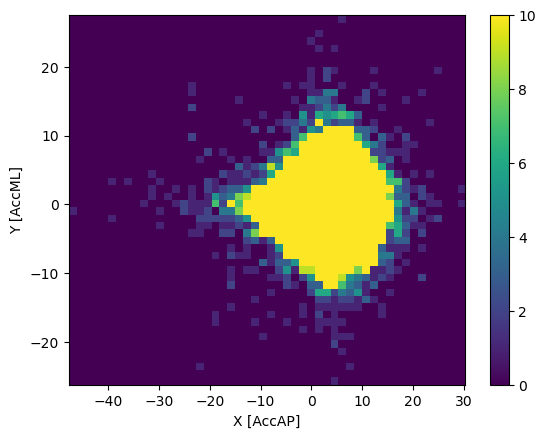

In [24]:
plt.hist2d(full_tdcsfog_dataset['AccAP'], full_tdcsfog_dataset['AccML'], bins=(50, 50), vmax=10)
plt.colorbar()
plt.xlabel('X [AccAP]')
plt.ylabel('Y [AccML]')
ax = plt.gca()
ax.axis('tight')


(-47.8296390463539, 30.3376942190701, -35.5211193954646, 20.9069528826542)

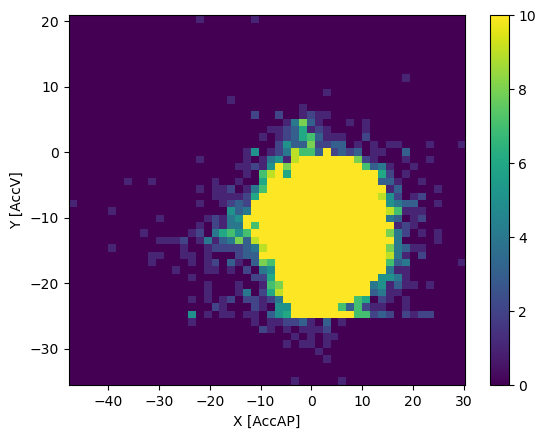

In [25]:
plt.hist2d(full_tdcsfog_dataset['AccAP'], full_tdcsfog_dataset['AccV'], bins=(50, 50), vmax=10)
plt.colorbar()
plt.xlabel('X [AccAP]')
plt.ylabel('Y [AccV]')
ax = plt.gca()
ax.axis('tight')


(-35.5211193954646, 20.9069528826542, -26.1643977260173, 27.4847190880829)

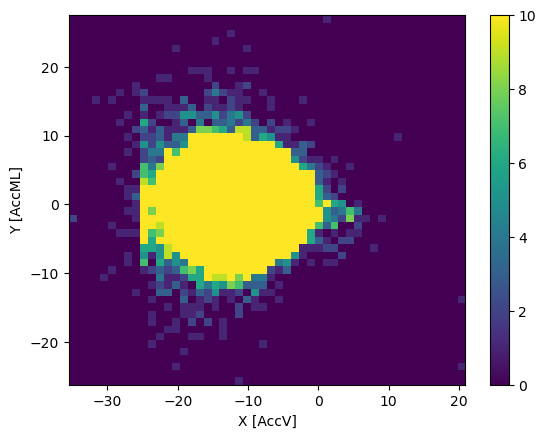

In [26]:
plt.hist2d(full_tdcsfog_dataset['AccV'], full_tdcsfog_dataset['AccML'], bins=(50, 50), vmax=10)
plt.colorbar()
plt.xlabel('X [AccV]')
plt.ylabel('Y [AccML]')
ax = plt.gca()
ax.axis('tight')


#### Remove some unecessary labels and clean

In [ ]:
remove_col = ['ID','Time', 'Valid', 'Task']
clean_defog_dataset = full_defog_dataset.drop(full_tdcsfog_dataset[remove_col],axis=1)
clean_defog_dataset.head()

In [27]:
remove_col = ['ID','Time']
clean_tdcsfog_dataset = full_tdcsfog_dataset.drop(full_tdcsfog_dataset[remove_col], axis=1)
clean_tdcsfog_dataset.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,-9.563005,0.147211,1.043645,0,0,0,1.0
1,-9.560686,0.156369,1.032437,0,0,0,1.0
2,-9.554016,0.149317,1.039120,0,0,0,1.0
3,-9.558530,0.149386,1.043640,0,0,0,1.0
4,-9.558615,0.142463,1.032258,0,0,0,1.0


In [28]:
# check duplication and null

clean_tdcsfog_dataset.duplicated().sum(), clean_tdcsfog_dataset.isna().sum()

(6181,
 AccV               0
 AccML              0
 AccAP              0
 StartHesitation    0
 Turn               0
 Walking            0
 All_zero           0
 dtype: int64)

In [29]:
clean_tdcsfog_dataset.drop_duplicates(inplace=True)
clean_tdcsfog_dataset.duplicated().sum()

0

In [30]:
clean_tdcsfog_dataset.shape

(7056491, 7)

In [34]:
# clean_tdcsfog_dataset.to_parquet('Data/clean/clean_tdcsfog_dataset.parquet')
clean_tdcsfog_dataset.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,-9.563005,0.147211,1.043645,0,0,0,1.0
1,-9.560686,0.156369,1.032437,0,0,0,1.0
2,-9.554016,0.149317,1.039120,0,0,0,1.0
3,-9.558530,0.149386,1.043640,0,0,0,1.0
4,-9.558615,0.142463,1.032258,0,0,0,1.0


In [35]:
condition = (clean_tdcsfog_dataset.StartHesitation == 0) & (clean_tdcsfog_dataset.Turn == 0 ) & (clean_tdcsfog_dataset.Walking == 0)
total_zero = clean_tdcsfog_dataset[condition].shape[0]
total_zero

4865095

In [36]:
All_zero = clean_tdcsfog_dataset[clean_tdcsfog_dataset.All_zero == 1].shape[0]
All_zero

4865095

In [37]:
All_zero == total_zero

True

In [38]:
a = clean_tdcsfog_dataset[clean_tdcsfog_dataset.StartHesitation == 1].shape[0]
a

304786

In [39]:
b = clean_tdcsfog_dataset[clean_tdcsfog_dataset.Walking == 1].shape[0]
b

207837

In [40]:
c = clean_tdcsfog_dataset[clean_tdcsfog_dataset.Turn == 1].shape[0]
c

1678773

In [41]:
clean_tdcsfog_dataset.shape[0] == a + b + c + All_zero

True

#### Feature and Labels

In [42]:
feature_col = ['AccV','AccML','AccAP']
label_col = ['StartHesitation','Turn','Walking', 'All_zero']

feature_dataset = clean_tdcsfog_dataset[feature_col]
label_dataset = clean_tdcsfog_dataset[label_col]

In [43]:
feature_dataset.head(), label_dataset.head()

(       AccV     AccML     AccAP
 0 -9.563005  0.147211  1.043645
 1 -9.560686  0.156369  1.032437
 2 -9.554016  0.149317  1.039120
 3 -9.558530  0.149386  1.043640
 4 -9.558615  0.142463  1.032258,
    StartHesitation  Turn  Walking  All_zero
 0                0     0        0       1.0
 1                0     0        0       1.0
 2                0     0        0       1.0
 3                0     0        0       1.0
 4                0     0        0       1.0)

#### Oversampling with SMOTE

In [44]:
from imblearn.over_sampling import SMOTE
import numpy as np
# Instantiate the MultiLabelUnderSampler
over_sampler = SMOTE()

# Undersample the dataset
X_resampled, y_resampled = over_sampler.fit_resample(feature_dataset.to_numpy(), label_dataset.to_numpy())

In [45]:
feature_dataset.shape

(7056491, 3)

In [46]:
SMOTE_features_dataset = pd.DataFrame(X_resampled, columns=feature_dataset.columns)
SMOTE_features_dataset.shape

(19460380, 3)

In [47]:
SMOTE_labels_dataset = pd.DataFrame(y_resampled, columns=label_dataset.columns)
SMOTE_labels_dataset.shape

(19460380, 4)

In [48]:
a = SMOTE_labels_dataset[SMOTE_labels_dataset.StartHesitation == 1].shape[0]
b = SMOTE_labels_dataset[SMOTE_labels_dataset.Turn == 1].shape[0]
c = SMOTE_labels_dataset[SMOTE_labels_dataset.Walking ==1].shape[0]
d = SMOTE_labels_dataset[SMOTE_labels_dataset.All_zero == 1].shape[0]
a , b, c, d

(4865095, 4865095, 4865095, 4865095)

In [49]:
SMOTE_labels_dataset.shape[0] == a + b + c + d

True

In [50]:
oversampling_tdcsfog_dataset = pd.concat([SMOTE_features_dataset,SMOTE_labels_dataset], ignore_index= False, sort=False, axis=1)
oversampling_tdcsfog_dataset.shape[0]

19460380

In [51]:
# oversampling_tdcsfog_dataset.to_parquet('Data/clean/oversampling_tdcsfog_dataset.parquet')
oversampling_tdcsfog_dataset.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
0,-9.563005,0.147211,1.043645,0,0,0,1
1,-9.560686,0.156369,1.032437,0,0,0,1
2,-9.554016,0.149317,1.039120,0,0,0,1
3,-9.558530,0.149386,1.043640,0,0,0,1
4,-9.558615,0.142463,1.032258,0,0,0,1


### 70% Train Data, 10% Validation Data, 20% Test Data


80% Set Data(60% Train Data, 20% Validation Data) , 20% Test Data

In [62]:
from sklearn.model_selection import train_test_split
import random 
random_seed = 54

set_tdcsfog_data, test_tdcsfog_data = train_test_split(oversampling_tdcsfog_dataset, test_size=0.2, random_state=True)
set_tdcsfog_data.shape, test_tdcsfog_data.shape

((15568304, 7), (3892076, 7))

In [63]:
oversampling_tdcsfog_dataset.shape[0] == set_tdcsfog_data.shape[0] + test_tdcsfog_data.shape[0]

True

In [64]:
set_tdcsfog_data.head()

,AccV,AccML,AccAP,StartHesitation,Turn,Walking,All_zero
3722498,-12.153207,0.096835,1.405598,0,0,0,1
4382740,-8.478824,0.912786,3.455523,0,0,0,1
17018262,-7.880811,-1.906555,1.027819,0,0,1,0
18798337,-7.706927,0.775821,4.621651,0,0,1,0
8385476,-6.750845,0.369814,5.046322,1,0,0,0


#### Check all class are equal

In [66]:
a = set_tdcsfog_data[set_tdcsfog_data.StartHesitation == 1].shape[0]
b = set_tdcsfog_data[set_tdcsfog_data.Turn == 1].shape[0]
c = set_tdcsfog_data[set_tdcsfog_data.Walking == 1].shape[0]
d = set_tdcsfog_data[set_tdcsfog_data.All_zero == 1].shape[0]
a, b, c, d

(3891267, 3891868, 3891842, 3893327)

In [67]:
set_tdcsfog_data.shape[0] == a + b + c + d

True

In [68]:
a = test_tdcsfog_data[test_tdcsfog_data.StartHesitation == 1].shape[0]
b = test_tdcsfog_data[test_tdcsfog_data.Turn == 1].shape[0]
c = test_tdcsfog_data[test_tdcsfog_data.Walking == 1].shape[0]
d = test_tdcsfog_data[test_tdcsfog_data.All_zero == 1].shape[0]
a, b, c, d

(973828, 973227, 973253, 971768)

In [69]:
test_tdcsfog_data.shape[0] == a + b + c + d

True

In [70]:
# # Save process data

# set_tdcsfog_data.to_parquet('Data/Process/set_tdcsfog_data.parquet')
# test_tdcsfog_data.to_parquet('Data/Process/test_tdcsfog_data.parquet')

In [71]:
test_tdcsfog_data.duplicated().sum()

0

In [72]:
set_tdcsfog_data.duplicated().sum()

0